## Forecasting the likelihood of credit card default by a customer.

### Problem Description

The primary goal of this project is to forecast instances of customer default payments. With a focus on risk management, the accuracy of the predicted probability of default is considered more valuable than a binary classification of clients as either credible or not credible.

### Data Description
### Features:

In this research, a binary variable, default payment (1 for yes, 0 for no), was utilized as the response variable. The study examined relevant literature and incorporated 23 explanatory variables as part of the analysis.

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

### Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = 15, 6

### Getting Data Ready

In [2]:
df = pd.read_csv("default of credit card clients.csv")

print(df.shape)
print("Total number of features: ", df.shape[1])
print("Total number of datapoints: ", df.shape[0])

(30000, 25)
Total number of features:  25
Total number of datapoints:  30000


In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe()

# 1 - Graduate School
# 2 - University

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Findings:

* The customers' average mean limiting balance is 167,480. The median (50th percentile) balance is 140,000.
* The average age of customers is 35.5 years, with a standard deviation of 9.2.
* The predominant education level among customers is Graduate School and University.

### NULL Values

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There are no null values.

## Exploratory Data Analysis (EDA) &  Feature Engineering

### Dependent Variable:

In [7]:
# Rename the 'default payment next month' to 'IS_DEFAULTER'
df.rename(columns={'default payment next month': 'IS_DEFAULTER'}, inplace=True)

df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IS_DEFAULTER
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [8]:
df["IS_DEFAULTER"].value_counts()

0    23364
1     6636
Name: IS_DEFAULTER, dtype: int64

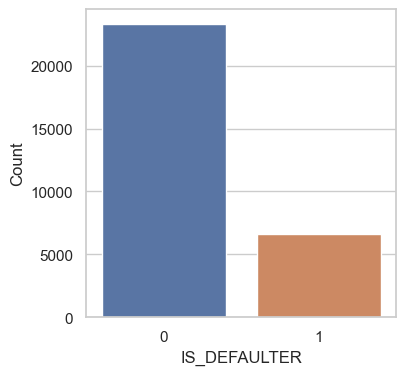

In [9]:
sns.set_theme(style="whitegrid")


fig = plt.figure(figsize = (4, 4))
sns.countplot(x = 'IS_DEFAULTER', data = df)
plt.ylabel("Count")
plt.show()

Based on the graph shown above, it is evident that the two classes are not balanced, indicating that we are dealing with an imbalanced dataset.

### Independent Features:

### Categorical Features

#### SEX
* Male - 1
* Female - 2

#### MARRIAGE
* Married - 1
* Single - 2
* Others - 3

#### EDUCATION
* Graduate School - 1
* University - 2
* High School - 3
* Others - 4

In [10]:
categorical_features = ["SEX", "MARRIAGE", "EDUCATION"]

In [11]:
# Getting the unique values in each categorical feature
for feature in categorical_features:
    print(feature + ": ", np.sort(df[feature].unique()))

SEX:  [1 2]
MARRIAGE:  [0 1 2 3]
EDUCATION:  [0 1 2 3 4 5 6]


* As we can see, the MARRIAGE feature has an undocumented label 0. Additionally, the EDUCATION feature has categories 5 and 6 that are unlabelled. Moreover, the category 0 is also undocumented.

In [12]:
df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

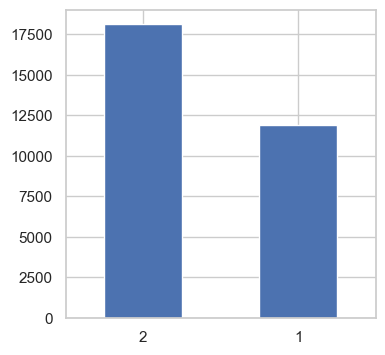

In [13]:
fig = plt.figure(figsize = (4, 4))
df["SEX"].value_counts().plot(kind = "bar")
plt.xticks(rotation = 0)
plt.show()

# 1 - Male
# 2 - Female

* Based on the graph shown above, there are more women than men in the dataset.

In [14]:
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

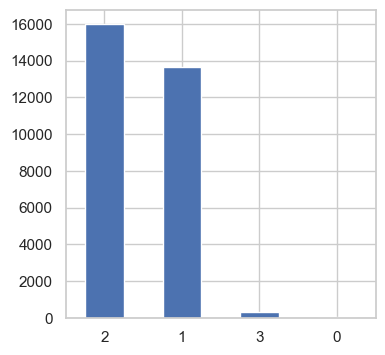

In [15]:
fig = plt.figure(figsize = (4, 4))
df["MARRIAGE"].value_counts().plot(kind = "bar")
plt.xticks(rotation = 0)
plt.show()

# 1 - Married
# 2 - Single
# 3 - Others
# 0 - Unlabelled

In [489]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

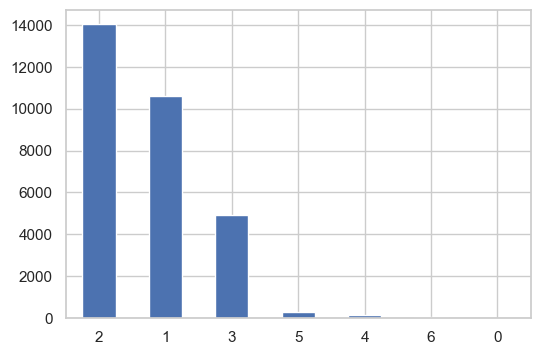

In [490]:
fig = plt.figure(figsize = (6, 4))
df["EDUCATION"].value_counts().plot(kind = "bar")
plt.xticks(rotation = 0)
plt.show()


# 1 - Graduate School
# 2 - University
# 3 - High School
# 4 - Others
# 0, 5, 6 - Unlabelled

As noted earlier, there are mislabeled or undocumented categories. Before continuing, it is essential to address this issue.

* The value 0 in the MARRIAGE feature can be appropriately reclassified as 'Others' (hence 3). Similarly, the values 0 (undocumented), 5, and 6 (unknown label) in the EDUCATION feature can be consolidated into an 'Others' category (hence 4).

In [492]:
replacement_dict = {0: 3}
df["MARRIAGE"] = df["MARRIAGE"].replace(replacement_dict)

df["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [491]:
replacement_dict = {5: 4, 6: 4, 0: 4}
df["EDUCATION"] = df["EDUCATION"].replace(replacement_dict)

df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

### More Insights on Categorical Features

In [493]:
df_cat = df[categorical_features]
df_cat['DEFAULTER'] = df['IS_DEFAULTER']

In [494]:
df_cat.replace({'SEX': {1 : 'Male', 2 : 'Female'}, 'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}, 'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)

<Figure size 1000x500 with 0 Axes>

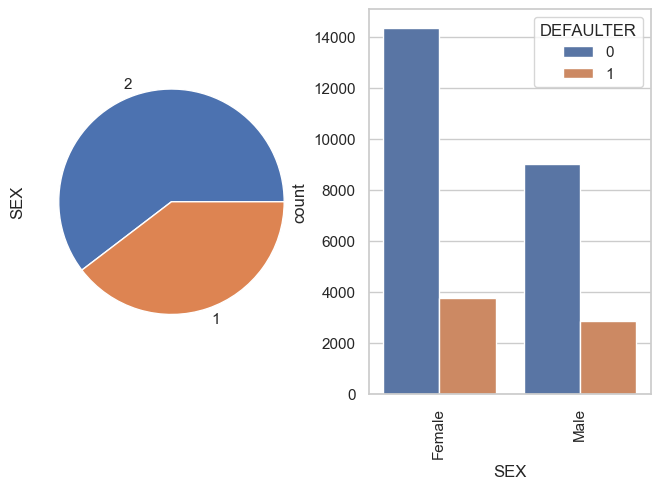

<Figure size 1000x500 with 0 Axes>

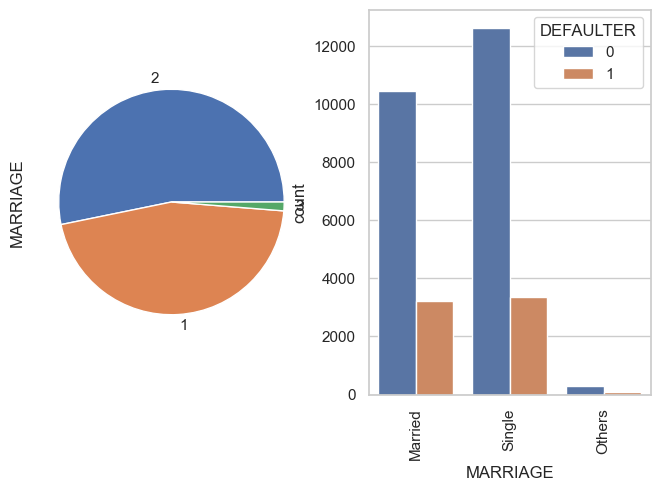

<Figure size 1000x500 with 0 Axes>

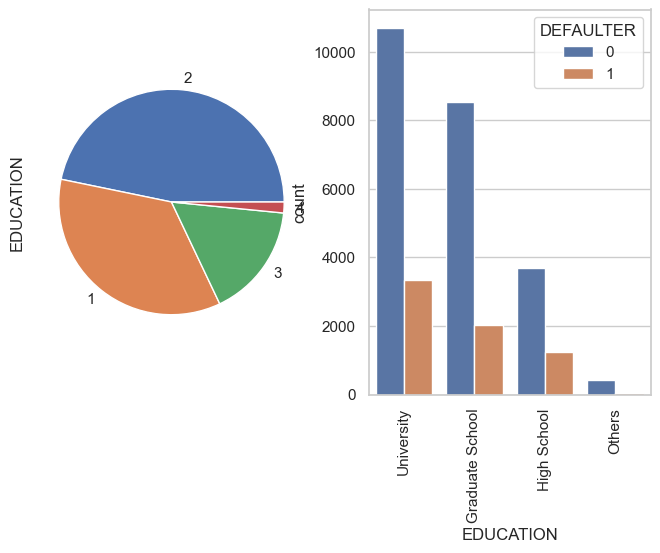

In [495]:
for col in categorical_features:
    plt.figure(figsize=(10,5))
    fig, axes = plt.subplots(ncols=2,figsize=(8, 5))
    df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
    plt.xticks(rotation = 90)
    sns.countplot(x = col, hue = 'DEFAULTER', data = df_cat)

#### Correlation b/w SEX and IS_DEFAULTER

In [515]:
gender = df.groupby(['SEX', 'IS_DEFAULTER']).size().unstack(1)
gender['perc'] = (gender[1]/(gender[0] + gender[1])) 

gender

IS_DEFAULTER,0,1,perc
SEX,,,
1,9015,2873,0.241672
2,14349,3763,0.207763


Given that approximately 22% of the customers are expected to default, we observe two main patterns:

* There is a notable gender imbalance, with a higher number of female customers than male customers.
* Among the male customers, the likelihood of defaulting in the upcoming month is the highest.

--------------------------------------------------------------------------------------------------------------------------------

#### Correlation b/w EDUCATION and IS_DEFAULTER

In [516]:
edu = df.groupby(['EDUCATION', 'IS_DEFAULTER']).size().unstack(1)
edu['perc'] = (edu[1]/(edu[0] + edu[1])) 

edu

IS_DEFAULTER,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


It appears that there is an inverse relationship between education level and the likelihood of defaulting in the following month. Generally, as the education level increases, the probability of default decreases. There is an exception for the category labeled as "Other," which, according to the documentation, should be lower than high school. However, numerically, this category does not significantly influence the final result.

--------------------------------------------------------------------------------------------------------------------------------

#### Correlation b/w MARRIAGE and IS_DEFAULTER

In [517]:
mar = df.groupby(['MARRIAGE', 'IS_DEFAULTER']).size().unstack(1)
mar['perc'] = (mar[1]/(mar[0] + mar[1]))

mar

IS_DEFAULTER,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


In this case, it appears that both married individuals and the mysterious "Other" category have the highest likelihood of defaulting, with the latter being less numerically significant compared to the other categories.

--------------------------------------------------------------------------------------------------------------------------------

### Numerical Features

#### History Payment Status

Now, let's go through the features that show the history of past payment, or more specifically, the repayment status in September, August, July, June, May, and April of the year 2005.

In [496]:
# Renaming columns

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

In [497]:
repayment_status_features = ["PAY_SEPT", "PAY_AUG", "PAY_JUL", "PAY_JUN", "PAY_MAY", "PAY_APR"]

In [498]:
# Code for getting the unique values in each categorical feature
for feature in repayment_status_features:
    print(feature, np.sort(df[feature].unique()))

PAY_SEPT [-2 -1  0  1  2  3  4  5  6  7  8]
PAY_AUG [-2 -1  0  1  2  3  4  5  6  7  8]
PAY_JUL [-2 -1  0  1  2  3  4  5  6  7  8]
PAY_JUN [-2 -1  0  1  2  3  4  5  6  7  8]
PAY_MAY [-2 -1  0  2  3  4  5  6  7  8]
PAY_APR [-2 -1  0  2  3  4  5  6  7  8]


* In all of the above features, we can see -2 and 0 labels, which are undocumented. Now, as given in the dataset documentation, -1 represents "pay duly," and 1, 2, 3, ..., 8 represent payment delays for a given month. But then, what do the labels 0 and -2 represent?

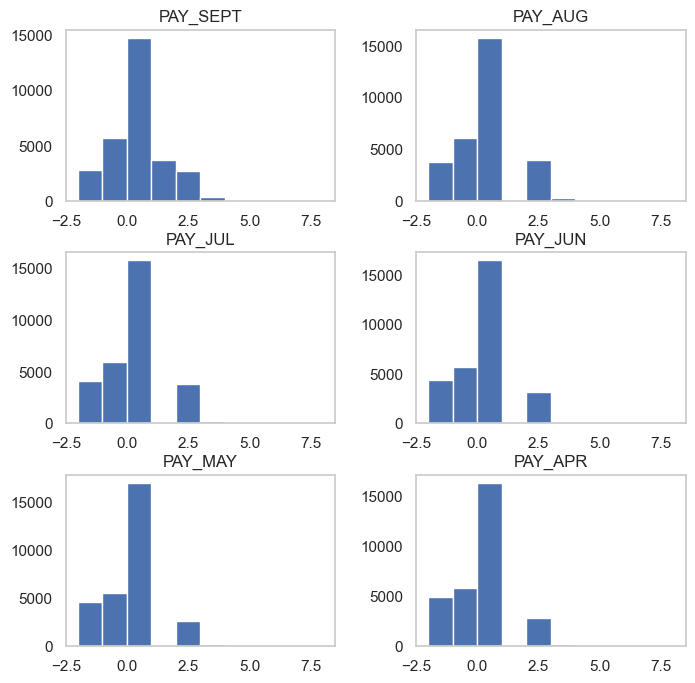

In [499]:
df[repayment_status_features].hist(figsize = (8, 8), grid=False)
plt.show()

Based on our documentation, the PAY_MONTH variables represent the number of months of delay in payment, and the value -1 indicates "pay duly." Now, I wonder what the values -2 and 0 signify? It appears that we should adjust the label to 0 for "pay duly."

In [500]:
replacement_dict = {-2: 0, -1: 0}

for feature in repayment_status_features:
    df[feature] = df[feature].replace(replacement_dict)
    
for feature in repayment_status_features:
    print(feature, np.sort(df[feature].unique()))

PAY_SEPT [0 1 2 3 4 5 6 7 8]
PAY_AUG [0 1 2 3 4 5 6 7 8]
PAY_JUL [0 1 2 3 4 5 6 7 8]
PAY_JUN [0 1 2 3 4 5 6 7 8]
PAY_MAY [0 2 3 4 5 6 7 8]
PAY_APR [0 2 3 4 5 6 7 8]


#### Bill Statement

Now let's go through features that show the amount of bill statements in September, August, July, June, May, and April for the year 2005.

In [501]:
# Renaming columns

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

In [502]:
bill_statement_features = ["BILL_AMT_SEPT", "BILL_AMT_AUG", "BILL_AMT_JUL", "BILL_AMT_JUN", "BILL_AMT_MAY", "BILL_AMT_APR"]

df[bill_statement_features].describe()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


* Here we can see the minimum value is negative. We need to understand what it signifies.

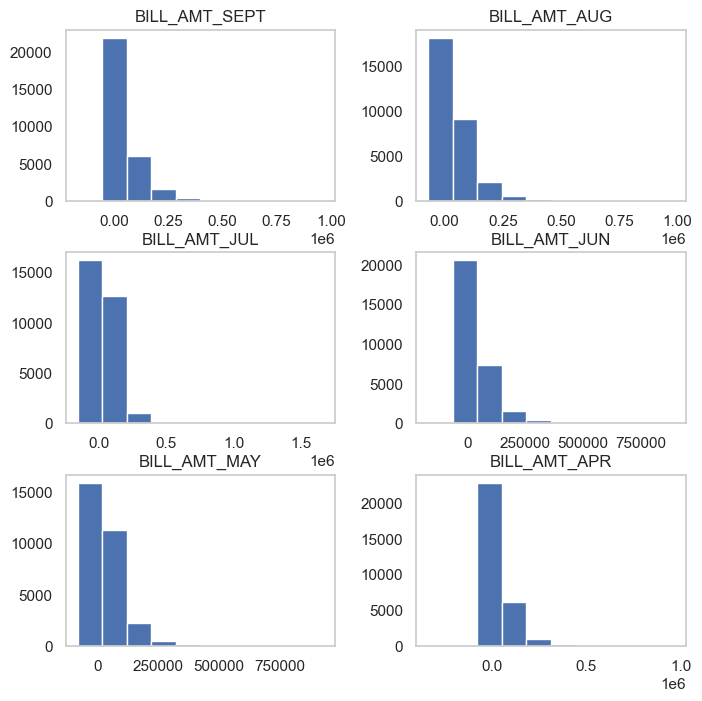

In [503]:
df[bill_statement_features].hist(figsize = (8, 8), grid=False)
plt.show()

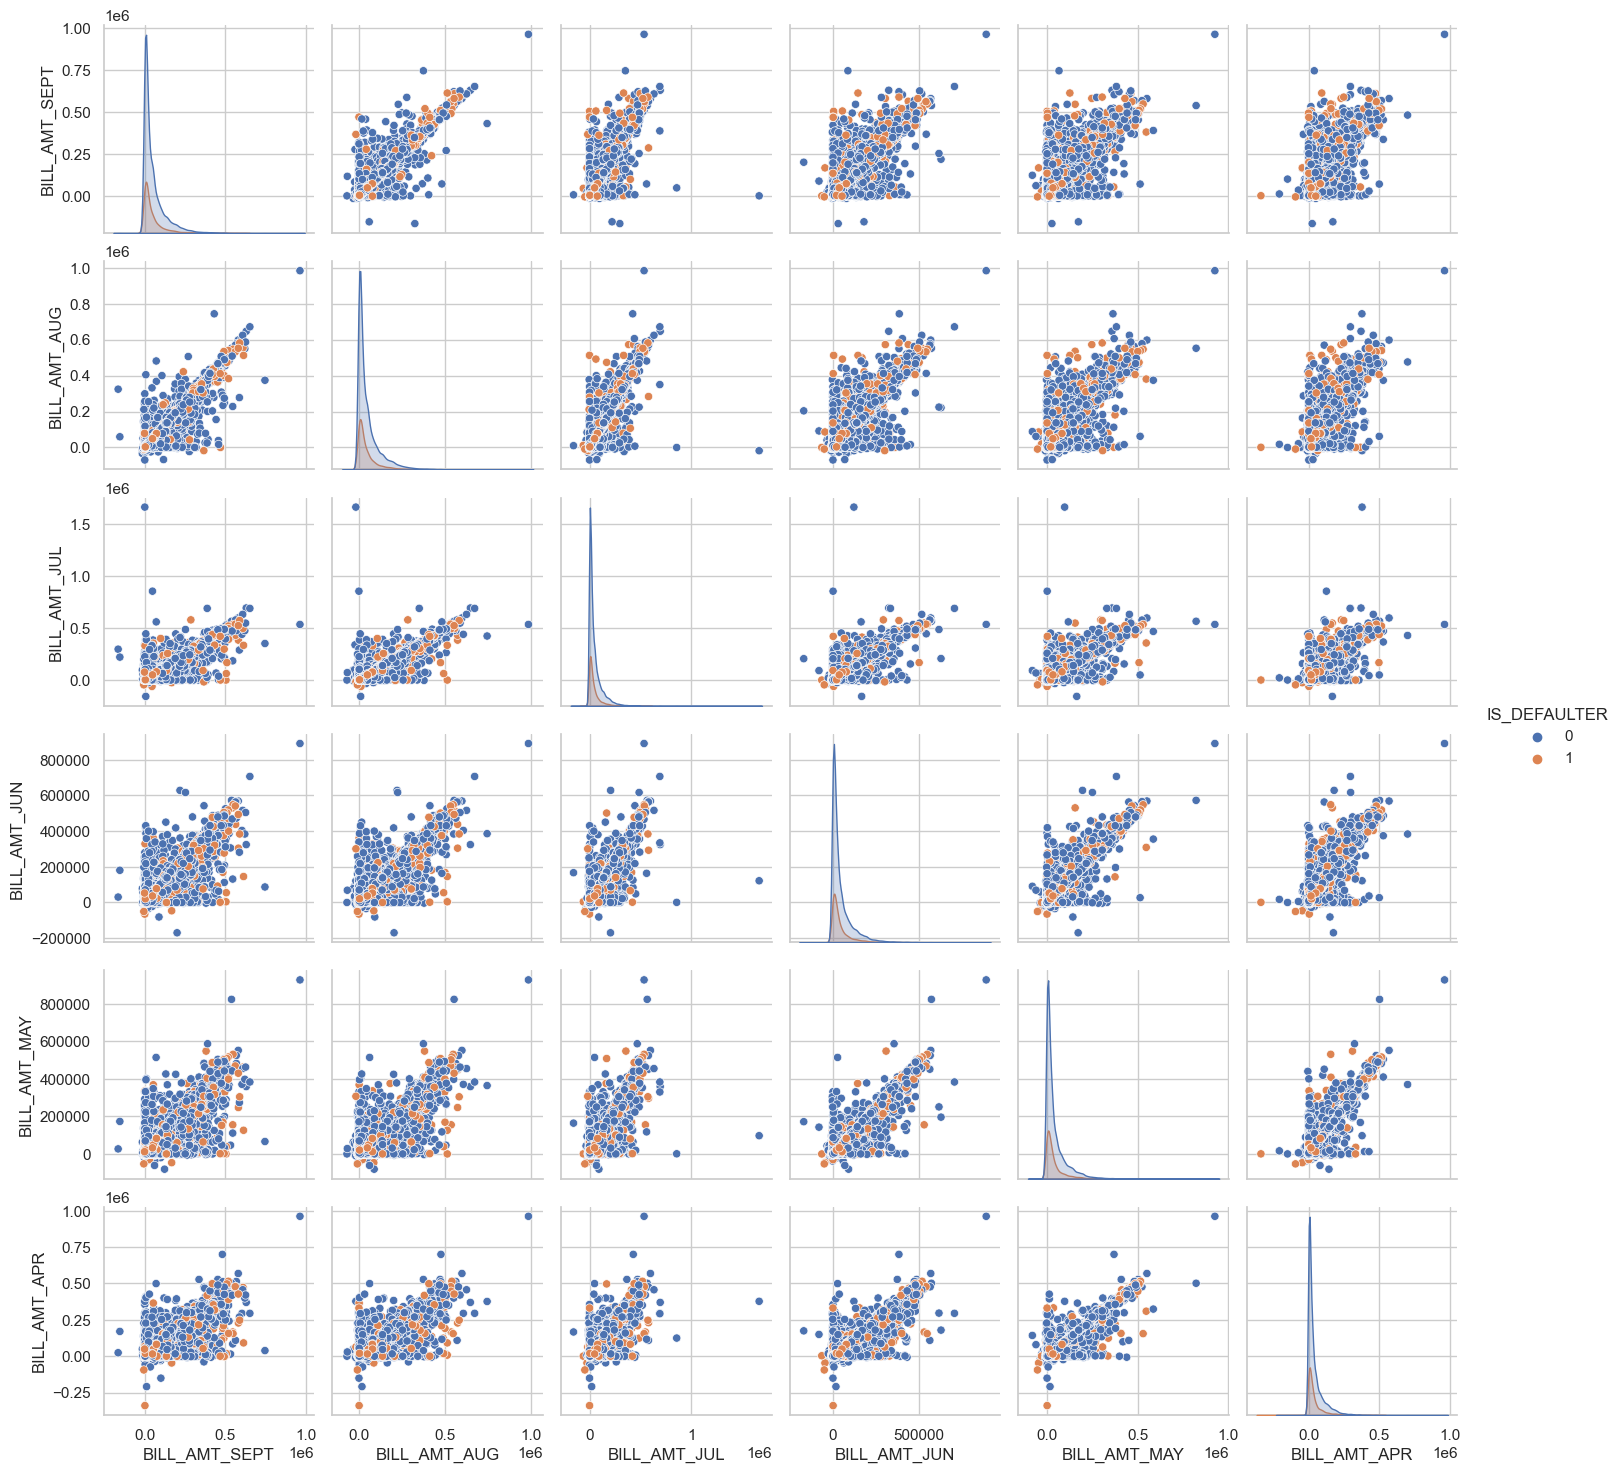

In [504]:
pairplot_features = ["IS_DEFAULTER"]
pairplot_features.extend(bill_statement_features)
sns.pairplot(data = df[pairplot_features], hue='IS_DEFAULTER')

#### Paid Amount

Now let's go through features that show the amount of previous payment in September, August, July, June, May, and April for the year 2005.

In [505]:
# Renaming columns

df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [506]:
previous_payment_features = ["PAY_AMT_SEPT", "PAY_AMT_AUG", "PAY_AMT_JUL", "PAY_AMT_JUN", "PAY_AMT_MAY", "PAY_AMT_APR"]

df[previous_payment_features].describe()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Findings:
* The standard deviation for each month's payment amounts is relatively high.
* The minimum payment amounts for all months are 0.
* Presence of very high payment amounts in the upper percentiles

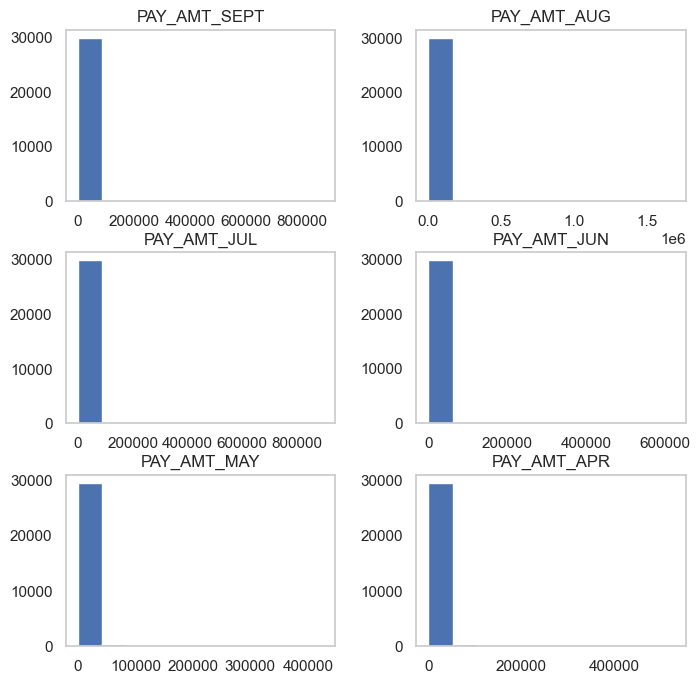

In [507]:
df[previous_payment_features].hist(figsize = (8, 8), grid=False)
plt.show()

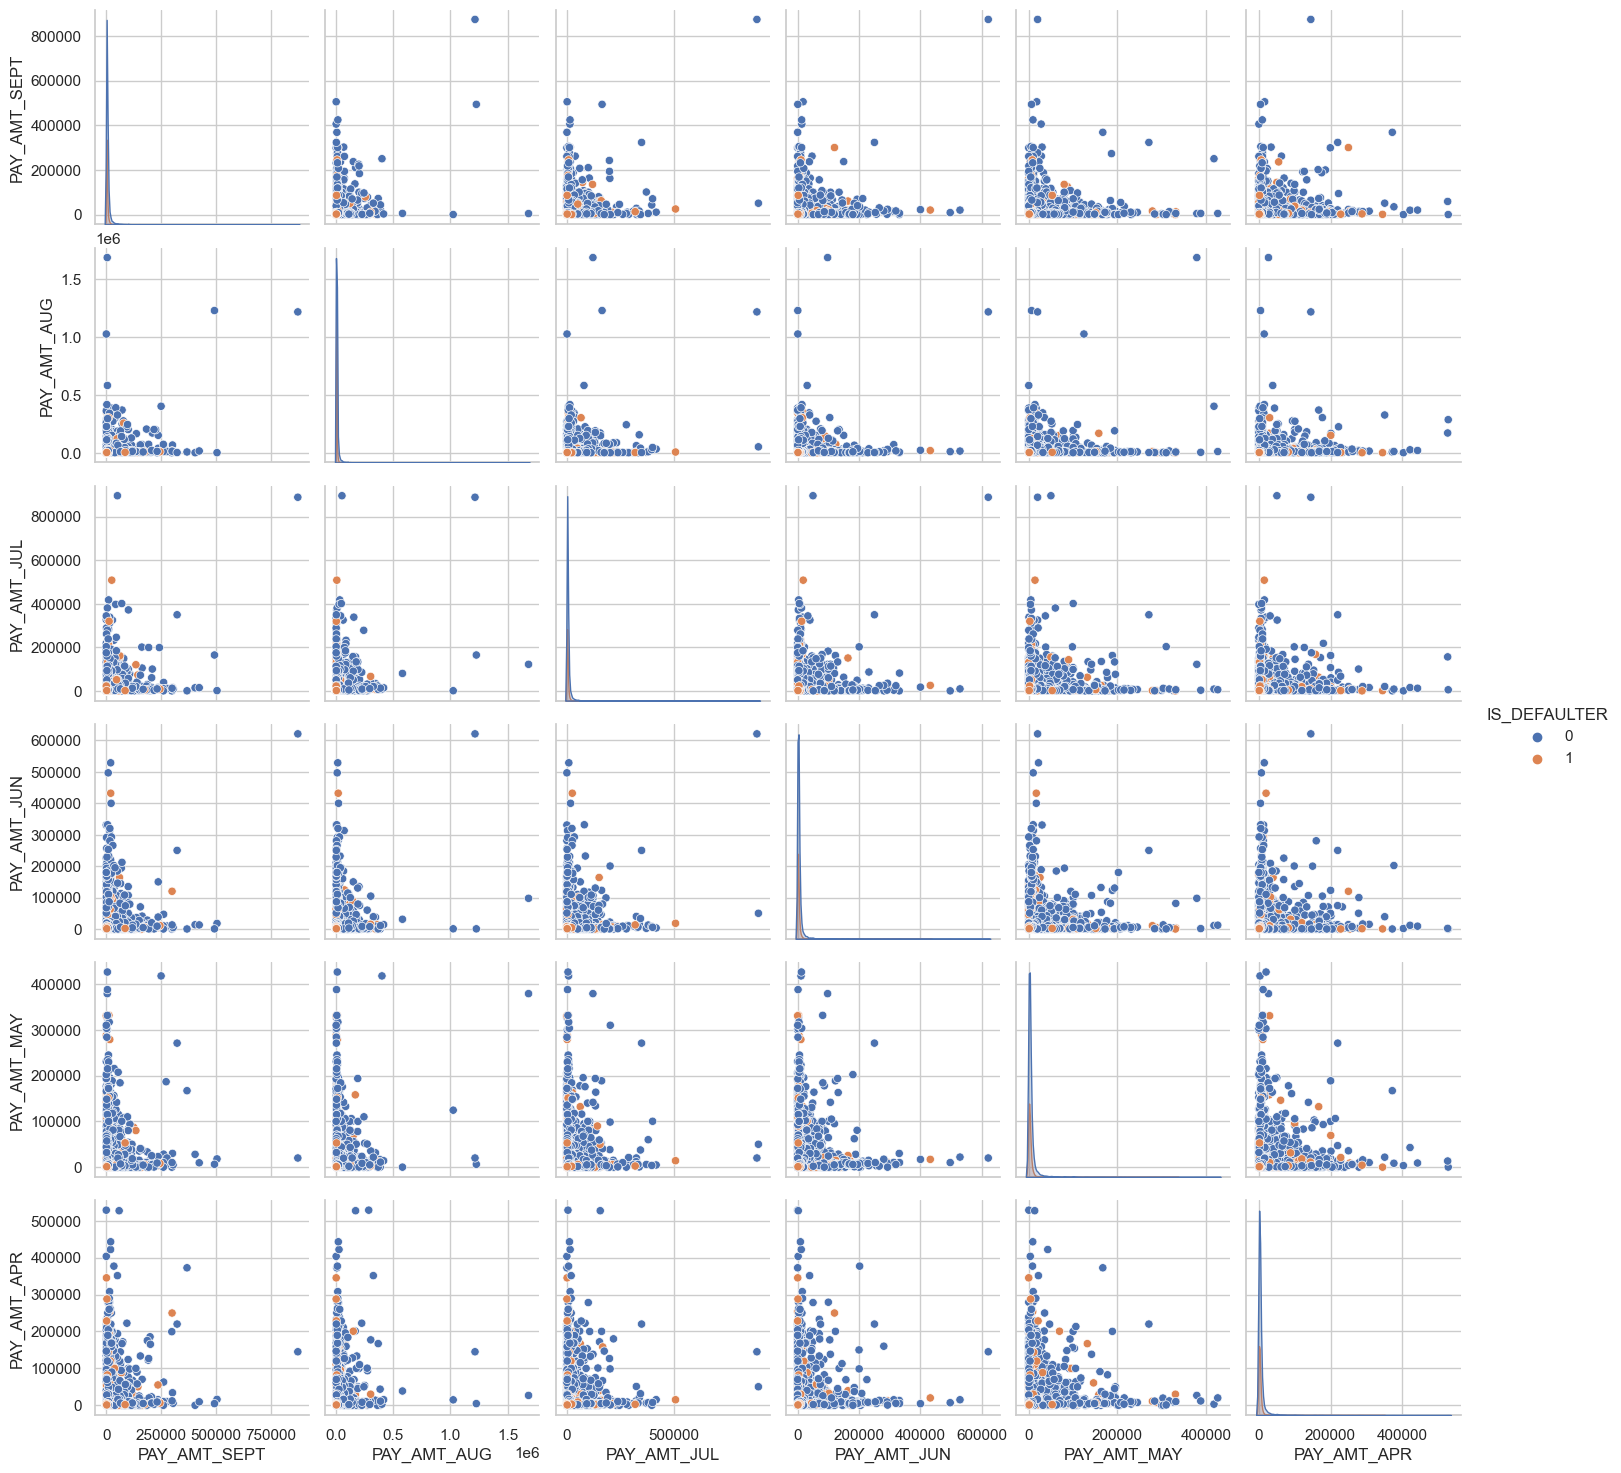

In [508]:
pairplot_features = ["IS_DEFAULTER"]
pairplot_features.extend(previous_payment_features)
sns.pairplot(data = df[pairplot_features], hue='IS_DEFAULTER')

#### LIMIT_BAL

Let's analyze the feature LIMIT_BAL, which shows the amount of given credit.

In [509]:
df["LIMIT_BAL"].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

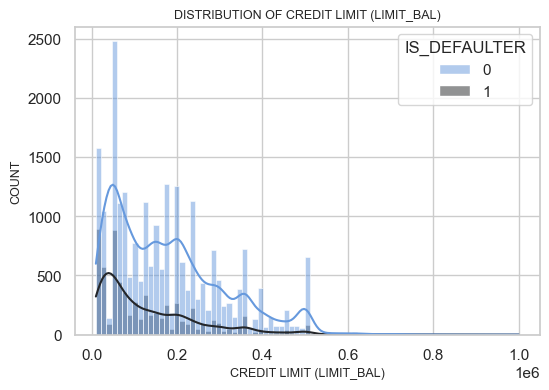

In [510]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='LIMIT_BAL', hue=df["IS_DEFAULTER"], kde=True, palette='dark:#69d_r')
plt.title('DISTRIBUTION OF CREDIT LIMIT (LIMIT_BAL)', fontsize=9)
plt.xlabel('CREDIT LIMIT (LIMIT_BAL)', fontsize=9)
plt.ylabel('COUNT', fontsize=9)

plt.show()

#### LIMIT_BAL vs SEX

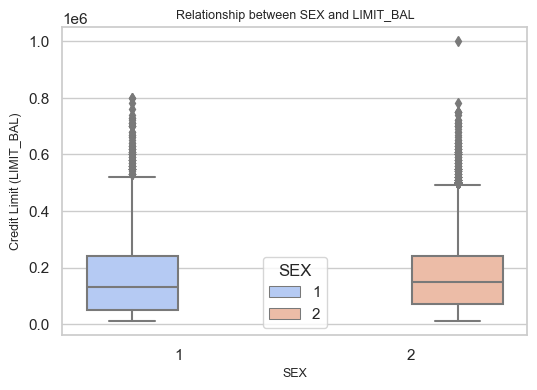

In [511]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='SEX', y='LIMIT_BAL', hue='SEX', palette='coolwarm')

plt.title('Relationship between SEX and LIMIT_BAL', fontsize=9)
plt.xlabel('SEX', fontsize=9)
plt.ylabel('Credit Limit (LIMIT_BAL)', fontsize=9)

plt.show()

* The credit limit is quite balanced between both the genders.



#### AGE

Let's analyze the feature AGE.

In [512]:
df["AGE"].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

<AxesSubplot:>

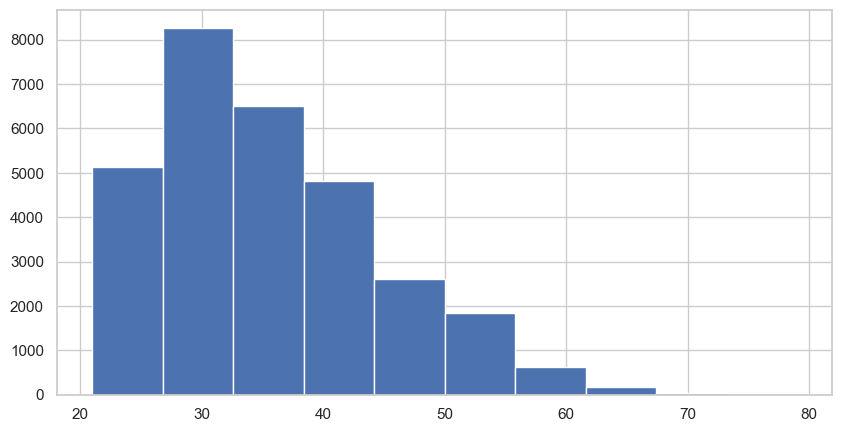

In [513]:
df["AGE"].hist(figsize = (10,5))

#### AGE vs IS_DEFAULTER

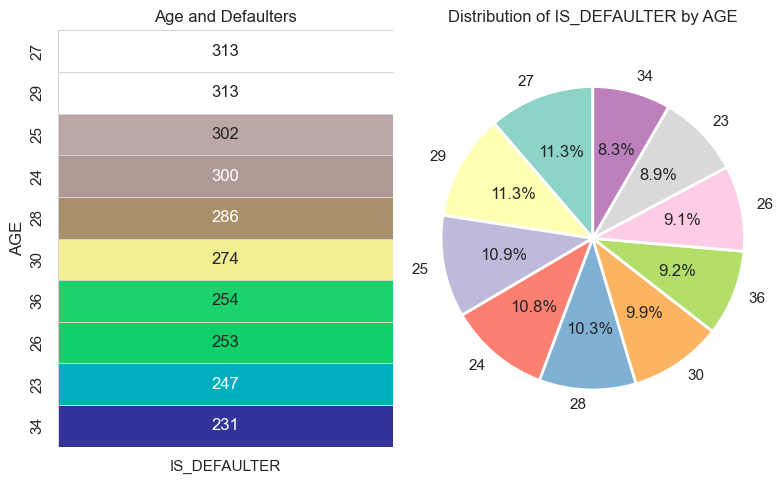

In [514]:
# Relationship between people's age and defaulters
education = df[['AGE', 'IS_DEFAULTER']].groupby(['AGE'], axis=0).sum().sort_values('IS_DEFAULTER', ascending=False)[:10]

palette = "Set3"
fig, axes = plt.subplots(1, 2, figsize=(8, 5))
axes[0].set_title('Age and Defaulters')
sns.heatmap(education, annot=True, fmt='d', cmap='terrain', cbar=False, linewidths=0.5, linecolor='lightgray', ax=axes[0])

axes[1].set_title("Distribution of IS_DEFAULTER by AGE")
axes[1].pie(education["IS_DEFAULTER"], labels=education.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette(palette), wedgeprops={'linewidth': 2, 'edgecolor': 'white'})
axes[1].axis("equal") 

plt.tight_layout() 
plt.show()

* What I notice is that the values denoting different monetary amounts exhibit a significantly wide range, which may lead to issues with certain models, such as linear regression models.

### Correlation Plots

#### History Payment Status

<AxesSubplot:>

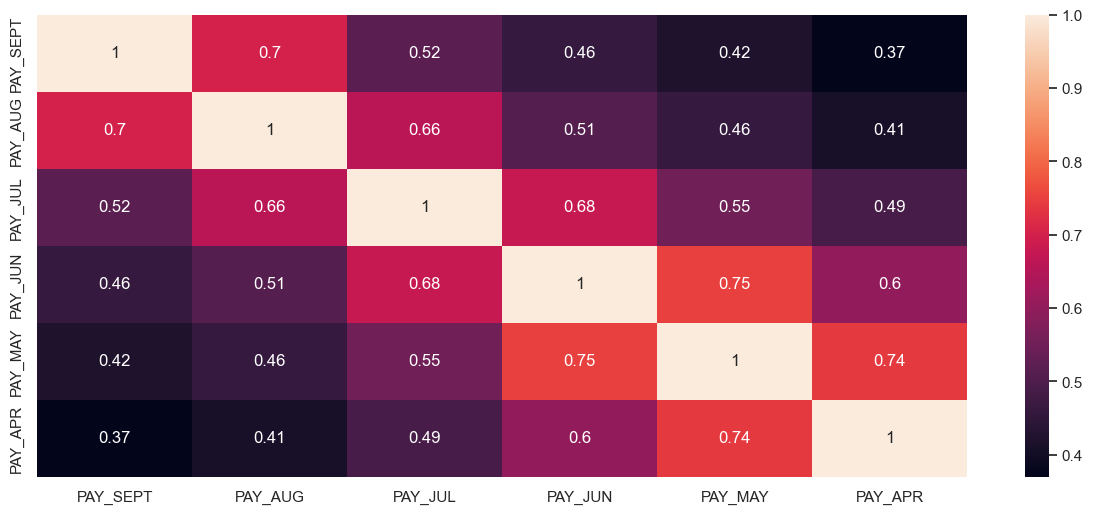

In [518]:
plt.figure()

sns.heatmap(np.round(df[repayment_status_features].corr(), 2), annot = True)

--------------------------------------------------------------------------------------------------------------------------------

#### Bill Statement

<AxesSubplot:>

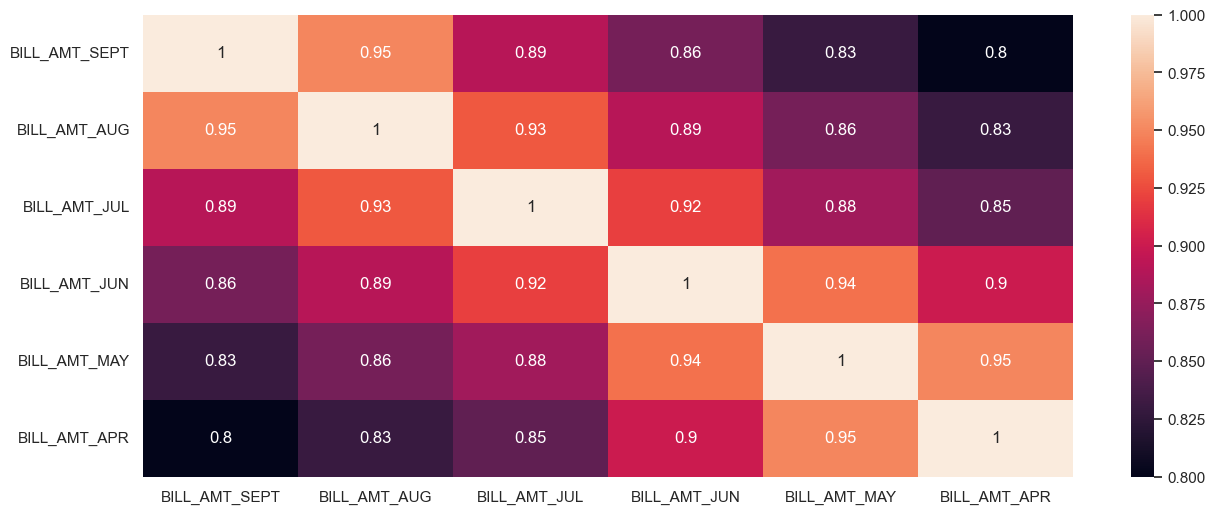

In [519]:
plt.figure()

sns.heatmap(np.round(df[bill_statement_features].corr(), 2), annot = True)

--------------------------------------------------------------------------------------------------------------------------------

#### Paid Amount

<AxesSubplot:>

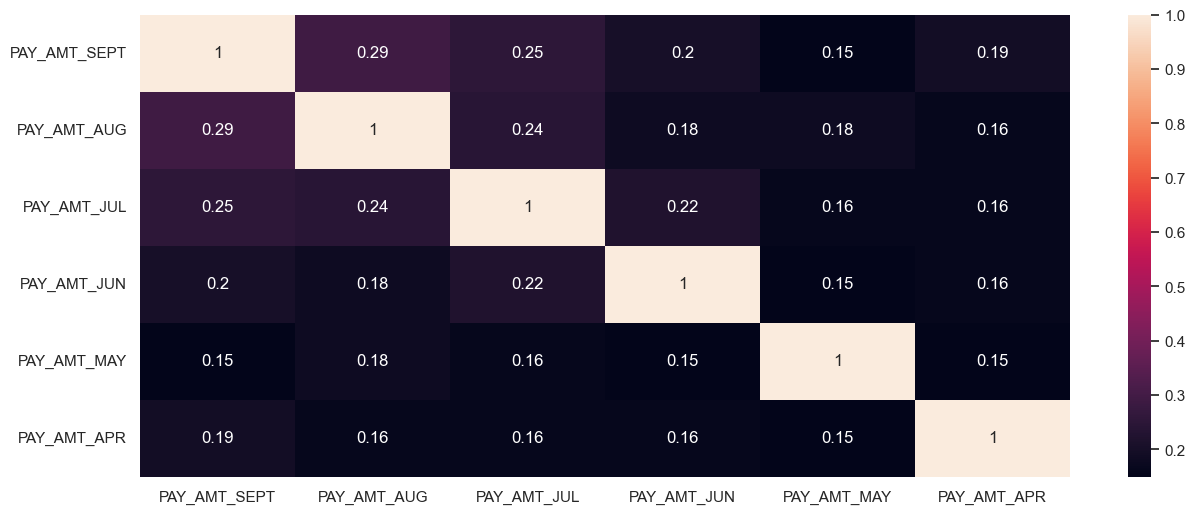

In [520]:
plt.figure()

sns.heatmap(np.round(df[previous_payment_features].corr(), 2), annot = True)

--------------------------------------------------------------------------------------------------------------------------------

## One Hot Encoding

In [521]:
df_new = df.copy()

In [522]:
df_new.replace({'SEX': {1 : 'Male', 2 : 'Female'}, 'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}, 'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df_new = pd.get_dummies(df_new,columns=['EDUCATION','MARRIAGE'])

In [523]:
df_new.drop(['EDUCATION_Others','MARRIAGE_Others'],axis = 1, inplace = True)

In [524]:
df_new = pd.get_dummies(df_new, columns = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [525]:
encoders_nums = {"SEX":{"Female": 0, "Male": 1}}
df_new = df_new.replace(encoders_nums)

In [526]:
df_new.drop('ID',axis = 1, inplace = True)

In [527]:
df_new.to_csv('final_df.csv', index=False)

In [528]:
df_new = pd.read_csv('./final_df.csv')

In [529]:
df_new.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_DEFAULTER,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Single,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Building & Training

In [530]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Training Models on Imbalanced Data
* Logistic Regression
* Random Forest
* Decision Tree
* XGBoost

In [531]:
df_imb = df_new.copy()

In [532]:
X_imb = df_imb.drop(["IS_DEFAULTER"], axis = 1)
y_imb = df_imb["IS_DEFAULTER"]

In [533]:
X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.2, random_state=42)

# Initializing the models
logreg = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgbclassif = xgb.XGBClassifier()

# Training the models
logreg.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
xgbclassif.fit(X_train, y_train)

# Making predictions
logreg_pred = logreg.predict(X_test)
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)
xgb_pred = xgbclassif.predict(X_test)

# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dtc_accuracy = accuracy_score(y_test, dtc_pred)
rfc_accuracy = accuracy_score(y_test, rfc_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dtc_accuracy)
print("Random Forest Accuracy:", rfc_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Logistic Regression Accuracy: 0.7811666666666667
Decision Tree Accuracy: 0.7251666666666666
Random Forest Accuracy: 0.8163333333333334
XGBoost Accuracy: 0.8148333333333333


### Training Models on Balanced Data (SMOTE)
* Logistic Regression
* Random Forest
* Decision Tree
* XGBoost

In [534]:
df_imb = df_new.copy()

In [535]:
X = df_imb.drop(["IS_DEFAULTER"], axis = 1)
y = df_imb["IS_DEFAULTER"]

In [536]:
# SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Initializing the models
logreg = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgbclassif = xgb.XGBClassifier()

# Training the models
logreg.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
xgbclassif.fit(X_train, y_train)

# Making predictions
logreg_pred = logreg.predict(X_test)
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)
xgb_pred = xgbclassif.predict(X_test)

# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dtc_accuracy = accuracy_score(y_test, dtc_pred)
rfc_accuracy = accuracy_score(y_test, rfc_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dtc_accuracy)
print("Random Forest Accuracy:", rfc_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Logistic Regression Accuracy: 0.5743633640059919
Decision Tree Accuracy: 0.7772309009201798
Random Forest Accuracy: 0.8585491119195378
XGBoost Accuracy: 0.8353306227263


### Training Models on Balanced Data (BorderLineSMOTE)
* Logistic Regression
* Random Forest
* Decision Tree
* XGBoost

In [537]:
df_imb = df_new.copy()

In [538]:
IS_DEFAULTER = df_imb["IS_DEFAULTER"]
df_imb.drop(["IS_DEFAULTER"], axis = 1, inplace = True)
df_imb["IS_DEFAULTER"] = IS_DEFAULTER
df_imb.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Single,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IS_DEFAULTER
0,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [539]:
# Load and summarize the dataset
from matplotlib import pyplot
from collections import Counter
from sklearn.preprocessing import LabelEncoder

Class = 1, n = 6636 (22.120%)
Class = 0, n = 23364 (77.880%)


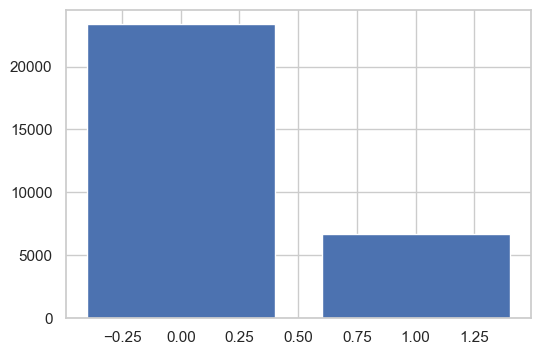

In [540]:
data = df_imb.to_numpy()

# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print("Class = %d, n = %d (%.3f%%)" % (k, v, per))
    
# plot the distribution
plt.figure(figsize = (6,4))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [541]:
# Example of oversampling a binary-class classification dataset
from numpy import where
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import BorderlineSMOTE

Class = 1, n = 23364 (50.000%)
Class = 0, n = 23364 (50.000%)


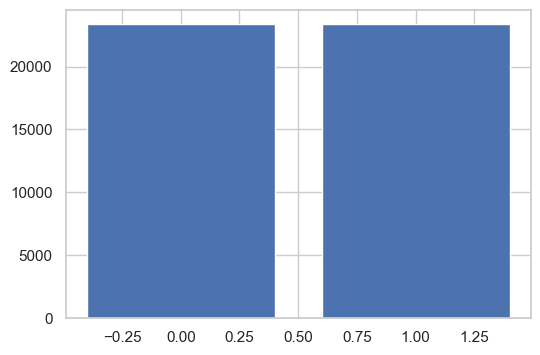

In [542]:
data = df_imb.to_numpy()

# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# transform the dataset
oversample = BorderlineSMOTE() # synthetic minority oversampling technique
X, y = oversample.fit_resample(X, y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class = %d, n = %d (%.3f%%)' % (k, v, per))
    
# plot the distribution
plt.figure(figsize=(6, 4))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [543]:
X_bsmote = X.copy()
y_bsmote = y.copy()

In [544]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bsmote, y_bsmote, test_size=0.2, random_state=42)

# Initializing the models
logreg = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgbclassif = xgb.XGBClassifier()

# Training the models
logreg.fit(X_train, y_train)
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
xgbclassif.fit(X_train, y_train)

# Making predictions
logreg_pred = logreg.predict(X_test)
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)
xgb_pred = xgbclassif.predict(X_test)

# Calculating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
dtc_accuracy = accuracy_score(y_test, dtc_pred)
rfc_accuracy = accuracy_score(y_test, rfc_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Printing the accuracy scores
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dtc_accuracy)
print("Random Forest Accuracy:", rfc_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)

Logistic Regression Accuracy: 0.574791354590199
Decision Tree Accuracy: 0.7835437620372352
Random Forest Accuracy: 0.8596190883800556
XGBoost Accuracy: 0.8370425850631286


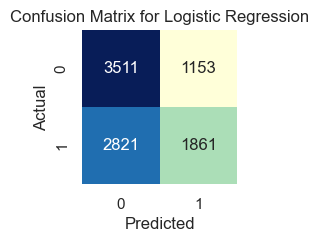

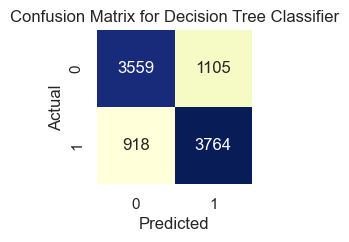

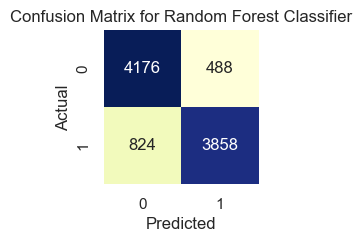

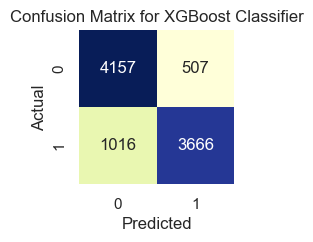

In [545]:
# function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(2,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title('Confusion Matrix for ' + model_name)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.yticks(ticks=np.arange(len(labels))+0.5, labels=labels)
    plt.show()

# Plotting the confusion matrix and classification report for each model
plot_confusion_matrix(y_test, logreg_pred, labels=[0, 1], model_name = "Logistic Regression")
plot_confusion_matrix(y_test, dtc_pred, labels=[0, 1], model_name = "Decision Tree Classifier")
plot_confusion_matrix(y_test, rfc_pred, labels=[0, 1], model_name = "Random Forest Classifier")
plot_confusion_matrix(y_test, xgb_pred, labels=[0, 1], model_name = "XGBoost Classifier")

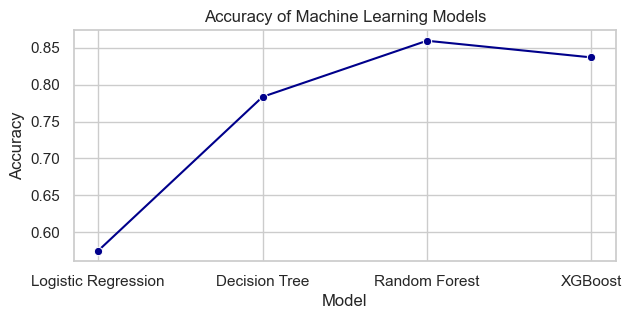

In [546]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [logreg_accuracy, dtc_accuracy, rfc_accuracy, xgb_accuracy]

plt.figure(figsize=(7,3))
sns.lineplot(x=models, y=accuracies, marker='o', color='darkblue')
plt.title('Accuracy of Machine Learning Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

## Hyperparameter Tuning 
* Random Forest
* XGBoost

### Random Forest
#### On SMOTE

In [547]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],    # Number of trees in the forest
    'max_depth': [None, 5, 10],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, cv=5,verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.3s
[CV] END max_depth=N

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   3.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   3.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.9s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.0s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] E

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   1

In [548]:
# Evaluate the model on the test set
accuracy = best_rf_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8596190883800556


#### On BorderLineSMOTE

In [549]:
X_train, X_test, y_train, y_test = train_test_split(X_bsmote, y_bsmote, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],    # Number of trees in the forest
    'max_depth': [None, 5, 10],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid=param_grid, cv=5,verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.0s
[CV] END max_depth=N

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.1s


[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] E

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=10; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2

In [550]:
# Evaluate the model on the test set
accuracy = best_rf_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8606890648405735


### XGBoost
#### On SMOTE

In [551]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of boosting rounds (trees)
    'max_depth': [3, 5, 7],                # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.3],     # Learning rate (step size) for each boosting round
}

# Perform GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.1s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   3.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   3.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=150; total time=   4.0s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=150; total time=   3.8s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=150; total time=   3.9s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=150; total time=   3.9s
[CV] END ....learning_rate=0.3, max_depth=5, n_estimators=50; total time=   2.1s
[CV] END ....learning_rate=0.3, max_depth=5, n_estimators=50; total time=   2.0s
[CV] END ....learning_rate=0.3, max_depth=5, n_estimators=50; total time=   2.2s
[CV] END ....learning_rate=0.3, max_depth=5, n_estimators=50; total time=   2.0s
[CV] END ....learning_rate=0.3, max_depth=5, n_estimators=50; total time=   2.1s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=100; total time=   4.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=100; total time=   4.0s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=100; total time=   4.0s
[CV] END ...learning_rate=0.

In [552]:
# Evaluate the model on the test set
accuracy = best_xgb_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8431414508880805


#### On BorderLineSMOTE

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X_bsmote, y_bsmote, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of boosting rounds (trees)
    'max_depth': [3, 5, 7],                # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.3],     # Learning rate (step size) for each boosting round
}

# Perform GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best estimator from GridSearchCV
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.3s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.4s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=150; total time=   3.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=150; total time=   3.6s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=150; total time=   4.0s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=150; total time=   3.8s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=150; total time=   3.6s
[CV] END ....learning_rate=0.3, max_depth=5, n_estimators=50; total time=   2.0s
[CV] END ....learning_rate=0.3, max_depth=5, n_estimators=50; total time=   2.0s
[CV] END ....learning_rate=0.3, max_depth=5, n_estimators=50; total time=   1.9s
[CV] END ....learning_rate=0.3, max_depth=5, n_estimators=50; total time=   2.0s
[CV] END ....learning_rate=0.3, max_depth=5, n_estimators=50; total time=   2.1s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=100; total time=   4.0s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=100; total time=   3.7s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=100; total time=   3.7s
[CV] END ...learning_rate=0.

In [554]:
# Evaluate the model on the test set
accuracy = best_xgb_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8421784720736144


--------------------------------------------------------------------------------------------------------------------------------

__Before Hyperparameter Tuning__

In [16]:
dictn = {
    "Model":["Logistic Regression Accuracy", "Decision Tree Accuracy", "Random Forest Accuracy", "XGBoost Accuracy"],
    "Imbalaced Data":[0.78, 0.72, 0.81, 0.81],
    "SMOTE":[0.57, 0.77, 0.85, 0.83],
    "BorderLineSMOTE":[0.57, 0.78, 0.85, 0.83]
}

dff = pd.DataFrame(dictn)
dff = dff.set_index("Model")
dff

,Imbalaced Data,SMOTE,BorderLineSMOTE
Model,,,
Logistic Regression Accuracy,0.78,0.57,0.57
Decision Tree Accuracy,0.72,0.77,0.78
Random Forest Accuracy,0.81,0.85,0.85
XGBoost Accuracy,0.81,0.83,0.83


__After Hyperparameter Tuning__

In [18]:
dictn = {
    "Model":["Random Forest Accuracy", "XGBoost Accuracy"],
    "SMOTE":[0.85, 0.84],
    "BorderLineSMOTE":[0.86, 0.84]
}

dff = pd.DataFrame(dictn)
dff = dff.set_index("Model")
dff

,SMOTE,BorderLineSMOTE
Model,,
Random Forest Accuracy,0.85,0.86
XGBoost Accuracy,0.84,0.84
